HERE WE WILL PREDICT THE MARKET CURVE USING XGBOOST

In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/spy.csv")
df

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,25.047169,25.047169,24.922556,25.029367,1003200,29,4,4,1,1993
1,1993-02-01,25.047171,25.207388,25.047171,25.207388,480500,1,0,5,2,1993
2,1993-02-02,25.189590,25.278599,25.136185,25.260798,201300,2,1,5,2,1993
3,1993-02-03,25.296384,25.545609,25.278582,25.527807,529400,3,2,5,2,1993
4,1993-02-04,25.616828,25.688036,25.331999,25.634630,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
7674,2023-07-24,453.369995,455.040009,452.299988,454.200012,54023400,24,0,30,7,2023
7675,2023-07-25,453.920013,456.739990,453.869995,455.440002,55191200,25,1,30,7,2023
7676,2023-07-26,454.470001,456.989990,453.380005,455.510010,71052900,26,2,30,7,2023
7677,2023-07-27,459.019989,459.440002,451.549988,452.489990,92194400,27,3,30,7,2023


<Axes: >

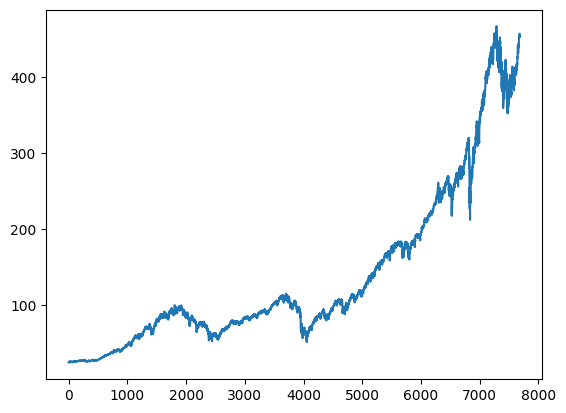

In [3]:
#show the data visually
df["Close"].plot()

In [5]:
#spliting the data
train_data = df.iloc[:int(.99*len(df)),:]
test_data = df.iloc[int(.99*len(df)):,:]


In [6]:
#making the model
#  defining the feature and variable
feature = ['Open',"Volume"]
traget = 'Close'


In [7]:
#creating and train the model
model = xgb.XGBRegressor()
model.fit(train_data[feature], train_data[traget])


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
#make and show the predictions
predicitions = model.predict(test_data[feature])
print("model predictions: ")
print(predicitions)

model predictions: 
[404.83716 411.54712 408.9738  405.26544 406.08862 409.56723 411.30054
 409.69818 407.6543  410.0364  409.75546 410.55414 403.43985 407.52206
 409.12616 410.56592 406.1482  413.35895 406.32086 408.5018  409.54935
 410.00223 408.3651  409.72342 409.72342 408.81332 411.37625 410.6938
 410.55414 409.7298  418.87744 418.8539  409.12616 411.95044 412.93713
 418.74954 422.87094 418.60175 425.05618 427.41602 423.50568 427.81787
 425.41388 426.91428 430.65768 432.894   432.30896 431.95016 440.6108
 437.56226 436.6618  439.23514 434.00845 439.02206 439.02206 437.56226
 438.34488 438.01248 440.8225  439.5109  440.36987 433.89566 442.04803
 444.7209  447.91232 444.37448 452.08618 454.08295 449.38318 457.60345
 465.07053 464.8366  464.47678 464.93137 465.07053 454.37827 456.0713 ]


In [9]:
#show the actual values of the etst_data
print("actual value: ")
print(test_data[traget])

actual value: 
7602    408.094086
7603    408.203674
7604    406.539856
7605    411.939819
7606    410.933533
           ...    
7674    454.200012
7675    455.440002
7676    455.510010
7677    452.489990
7678    456.920013
Name: Close, Length: 77, dtype: float64


In [10]:
#model accuracy
accuracy = model.score(test_data[feature], test_data[traget])
print("accuracy: ")
print(accuracy)

accuracy: 
0.9269428964082586


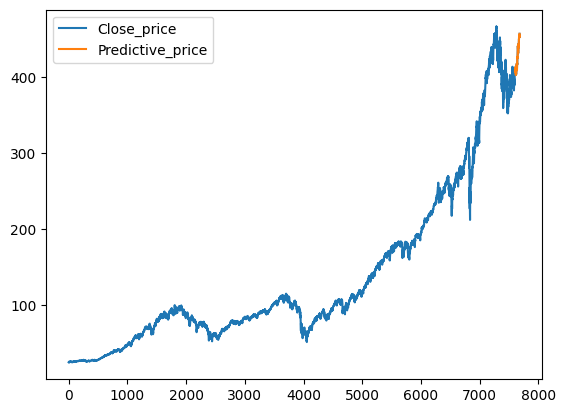

In [13]:
#ploting the prediction and the close price
plt.plot(df['Close'], label = 'Close_price')
plt.plot(test_data[traget], label = 'Predictive_price')
plt.legend()
plt.show()